In [0]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import  numpy as np

In [0]:
import seaborn as sns

In [0]:
churn = spark.read.csv("/mnt/churnfiles/ChurnTableFinal.csv", header="True",inferSchema=True)

In [0]:
# convert to Pandas dataframe
df_churn = churn.toPandas()

In [0]:

df_churn.head(5)

Out[93]:

,customer_id,first_name,last_name,dob,gender,marital_status,occupation,avg_family_size,income_level,date_onboarded,country,Age,NumProducts,Activemember,exitedcustomer,TotalLoan,AvgInterest,creditCardLimit,HasCredit,tenure,openaccounts,ExitedAll,LoanTotal,Exited,Withdrawls,Deposits,SumPositiveFeedback,SumNegativeFeedback,FeedbackRatio,balance,incomescore,numproductscore,tenurescore,avginterestscore,scoreBalance
0,160,NOREEN,MCKELVEY,12/27/1964 0:00,Female,Married,Developer I,3,Medium,1/1/2012 0:00,United States,57,4,1,0.0,1800000.0,6.500000,0.0,0,360,4,0,1800000.0,0,0,66038,16.0,NaN,16.00,66038,5,7,15,10,10
1,695,LOUISA,DANES,12/29/1957 0:00,Female,Married,Account Coordinator,2,Low,12/29/2013 0:00,United States,64,5,1,0.0,800000.0,5.200000,100000.0,1,224,5,0,800000.0,0,7753,94550,4.0,NaN,4.00,86797,0,9,15,10,10
2,8,CORT,LYSTON,1/1/1984 0:00,Male,Married,Senior Editor,3,Medium,12/28/2014 0:00,United States,38,8,1,1.0,800000.0,3.857143,50000.0,1,188,7,0,800000.0,1,0,40947,10.0,NaN,10.00,40947,5,15,15,10,10
3,773,KERI,BRINICOMBE,12/27/1981 0:00,Female,Married,Compensation Analyst,2,High,12/29/2013 0:00,United States,40,3,1,0.0,0.0,9.000000,800000.0,1,20,3,0,0.0,0,55362,34382,NaN,4.0,0.25,-20980,10,5,3,10,-1
4,835,RUSTY,WRIGHT,12/30/1951 0:00,Male,Married,Nuclear Power Engineer,2,Low,12/30/2012 0:00,United States,70,5,1,0.0,0.0,4.500000,800000.0,1,464,5,0,0.0,0,20246,208183,NaN,10.0,0.10,187937,0,9,15,10,10


In [0]:
# Summary of the dataset
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 29 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 gender 999 non-null object 
 1 marital_status 999 non-null object 
 2 occupation 999 non-null object 
 3 avg_family_size 999 non-null int32 
 4 income_level 999 non-null object 
 5 country 997 non-null object 
 6 Age 999 non-null int32 
 7 NumProducts 999 non-null int32 
 8 Activemember 999 non-null int32 
 9 TotalLoan 969 non-null float64
 10 AvgInterest 992 non-null float64
 11 creditCardLimit 983 non-null float64
 12 HasCredit 999 non-null int32 
 13 tenure 999 non-null int32 
 14 openaccounts 999 non-null int32 
 15 ExitedAll 999 non-null int32 
 16 LoanTotal 992 non-null float64
 17 Exited 999 non-null int32 
 18 Withdrawls 999 non-null int32 
 19 Deposits 999 non-null int32 
 20 SumPositiveFeedback 617 non-null float64
 21 SumNegativeFeedback 254 non-null float64
 22 FeedbackRatio 871 non-null float64
 23 balance 999 non-null int32 
 24 incomescore 999 non-null int32 
 25 numproductscore 999 non-null int32 
 26 tenurescore 999 non-null int32 
 27 avginterestscore 999 non-null int32 
 28 scoreBalance 999 non-null int32 
dtypes: float64(7), int32(17), object(5)
memory usage: 160.1+ KB

In [0]:
df_churn.drop(columns=['customer_id','first_name','last_name','dob','date_onboarded','exitedcustomer','country'], inplace=True)

In [0]:
df_churn.head(4)

Out[18]:

,gender,marital_status,occupation,avg_family_size,income_level,country,Age,NumProducts,Activemember,exitedcustomer,TotalLoan,AvgInterest,creditCardLimit,HasCredit,tenure,openaccounts,ExitedAll,LoanTotal,Exited,Withdrawls,Deposits,SumPositiveFeedback,SumNegativeFeedback,FeedbackRatio,balance,incomescore,numproductscore,tenurescore,avginterestscore,scoreBalance
0,Female,Married,Developer I,3,Medium,United States,57,4,1,0.0,1800000.0,6.500000,0.0,0,360,4,0,1800000.0,0,0,66038,16.0,NaN,16.00,66038,5,7,15,10,10
1,Female,Married,Account Coordinator,2,Low,United States,64,5,1,0.0,800000.0,5.200000,100000.0,1,224,5,0,800000.0,0,7753,94550,4.0,NaN,4.00,86797,0,9,15,10,10
2,Male,Married,Senior Editor,3,Medium,United States,38,8,1,1.0,800000.0,3.857143,50000.0,1,188,7,0,800000.0,1,0,40947,10.0,NaN,10.00,40947,5,15,15,10,10
3,Female,Married,Compensation Analyst,2,High,United States,40,3,1,0.0,0.0,9.000000,800000.0,1,20,3,0,0.0,0,55362,34382,NaN,4.0,0.25,-20980,10,5,3,10,-1


In [0]:
missing_sum = df_churn.isnull().sum()
missing_sum

Out[7]: gender 0
marital_status 0
occupation 0
avg_family_size 0
income_level 0
country 2
Age 0
NumProducts 0
Activemember 0
exitedcustomer 7
TotalLoan 30
AvgInterest 7
creditCardLimit 16
HasCredit 0
tenure 0
openaccounts 0
ExitedAll 0
LoanTotal 7
Exited 0
Withdrawls 0
Deposits 0
SumPositiveFeedback 382
SumNegativeFeedback 745
FeedbackRatio 128
balance 0
incomescore 0
numproductscore 0
tenurescore 0
avginterestscore 0
scoreBalance 0
dtype: int64

In [0]:
df_churn.shape

Out[8]: (999, 30)

In [0]:
df_churn['ExitedAll'].value_counts()

Out[9]: 0 995
1 4
Name: ExitedAll, dtype: int64

In [0]:
df_churn['Exited'].value_counts()/999 * 100

Out[10]: 0 63.663664
1 36.336336
Name: Exited, dtype: float64

In [0]:
df_churn['ExitedAll'].value_counts()/999 * 100

Out[11]: 0 99.5996
1 0.4004
Name: ExitedAll, dtype: float64

**Almost 99.5% belongs to exisiting customer and .4% of customer exited all. We have imbalanced class in this case. Around 36.3% of customer exited alteast one of the product**

Out[34]:

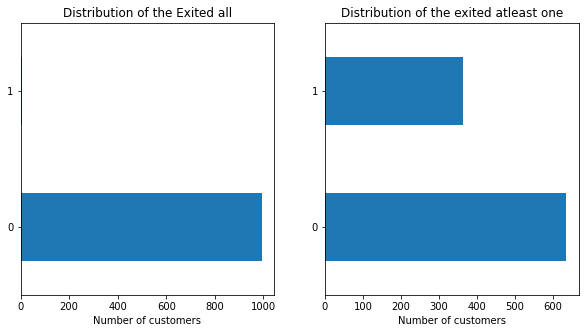

Text(0.5, 0, 'Number of customers')

In [0]:
# Ploting the distribution
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

df_churn['Exited'].value_counts().plot(kind='barh')
plt.title('Distribution of the exited atleast one')
plt.xlabel('Number of customers')

plt.subplot(1,2,1)
df_churn['ExitedAll'].value_counts().plot(kind='barh')
plt.title('Distribution of the Exited all')
plt.xlabel('Number of customers')


In [0]:
df_churn['occupation'].value_counts()

Out[74]: Senior Developer 18
Pharmacist 17
Structural Analysis Engineer 14
Technical Writer 13
Payment Adjustment Coordinator 13
 ..
Automation Specialist III 1
Budget/Accounting Analyst III 1
Budget/Accounting Analyst II 1
Accounting Assistant I 1
Engineer II 1
Name: occupation, Length: 191, dtype: int64

In [0]:
df_churn['gender'].value_counts()

Out[55]: Male 507
Female 491
FeMale 1
Name: gender, dtype: int64

In [0]:
df_churn['gender'].replace({'FeMale':'Female'},inplace=True)


In [0]:
# Defining a fution to group by different columns and ploting agint 'Attrition Flag'
def plot_dist(col_name, d_column ='ExitedAll',d_column1='Exited'):
       
    df_temp = df_churn.groupby([col_name])[d_column].value_counts()
    df_temp.unstack().plot(kind = 'barh')
    plt.xlabel('Number of customers')
    
    df_temp= df_churn.groupby([col_name])[d_column1].value_counts()
    df_temp.unstack().plot(kind = 'barh')
    plt.xlabel('Number of customers')
    
    return






Out[67]:

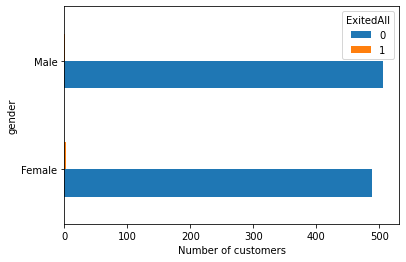

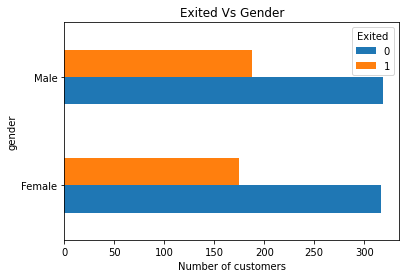

Text(0.5, 1.0, 'Exited Vs Gender')

In [0]:

plot_dist('gender')
plt.title('Exited Vs Gender')

Out[68]:

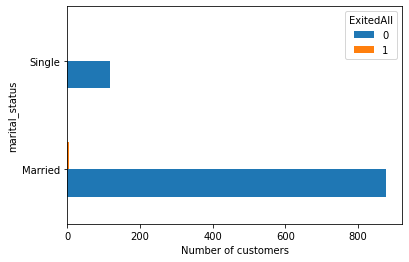

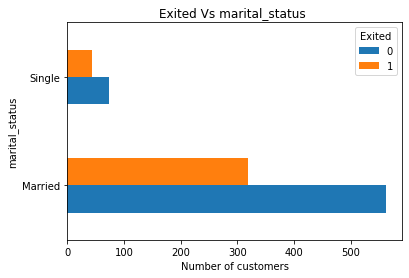

Text(0.5, 1.0, 'Exited Vs marital_status ')

In [0]:
plot_dist('marital_status')
plt.title("Exited Vs marital_status ")

**Distribution of Income Level vs Exited**

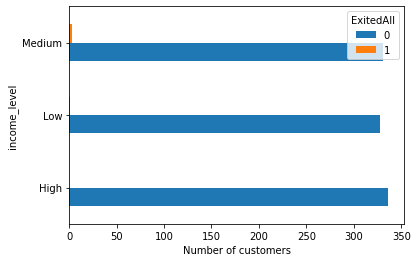

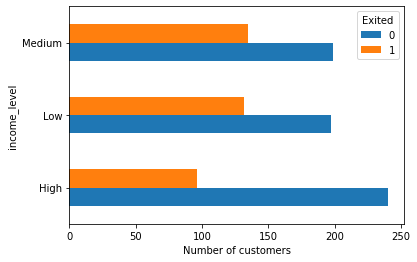

In [0]:
plot_dist('income_level') 

**Distribution of Active Member Vs Exited**

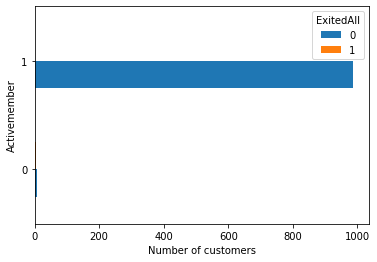

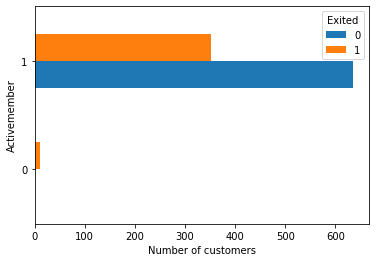

In [0]:
plot_dist('Activemember')

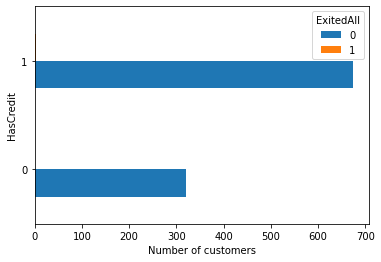

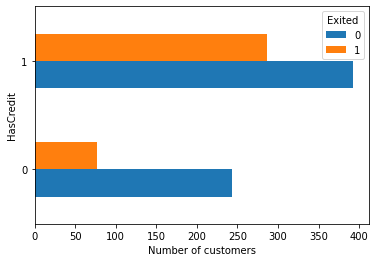

In [0]:
plot_dist('HasCredit')

### Exploring Numerical Variable###

In [0]:
df_churn1 = df_churn[['avg_family_size','Age','NumProducts','TotalLoan','AvgInterest','tenure','openaccounts','Withdrawls','Deposits','SumPositiveFeedback','SumNegativeFeedback',
                      'FeedbackRatio','balance','incomescore','numproductscore','tenurescore','avginterestscore','scoreBalance']]


In [0]:
df_churn1.describe().T

Out[80]:

,count,mean,std,min,25%,50%,75%,max
avg_family_size,999.0,3.941942e+00,1.451498e+00,1.000000,3.000000,4.0,5.0,7.0
Age,999.0,4.962262e+01,1.307573e+01,27.000000,38.000000,50.0,61.0,72.0
NumProducts,999.0,4.899900e+00,2.235169e+00,0.000000,3.000000,5.0,6.0,12.0
TotalLoan,969.0,1.662436e+06,1.827344e+06,0.000000,400000.000000,1100000.0,2400000.0,10700000.0
AvgInterest,992.0,8.010590e+00,3.735301e+00,0.000000,5.741071,8.0,10.0,18.0
tenure,999.0,2.866587e+02,2.128412e+02,0.000000,120.000000,260.0,404.0,1244.0
openaccounts,999.0,4.482482e+00,2.205714e+00,0.000000,3.000000,4.0,6.0,12.0
Withdrawls,999.0,2.443433e+04,2.890541e+04,0.000000,0.000000,15628.0,39140.0,165393.0
Deposits,999.0,1.148083e+05,7.365917e+04,0.000000,59606.500000,104919.0,160084.5,431196.0
SumPositiveFeedback,617.0,8.683955e+00,5.962732e+00,2.000000,4.000000,8.0,11.0,46.0


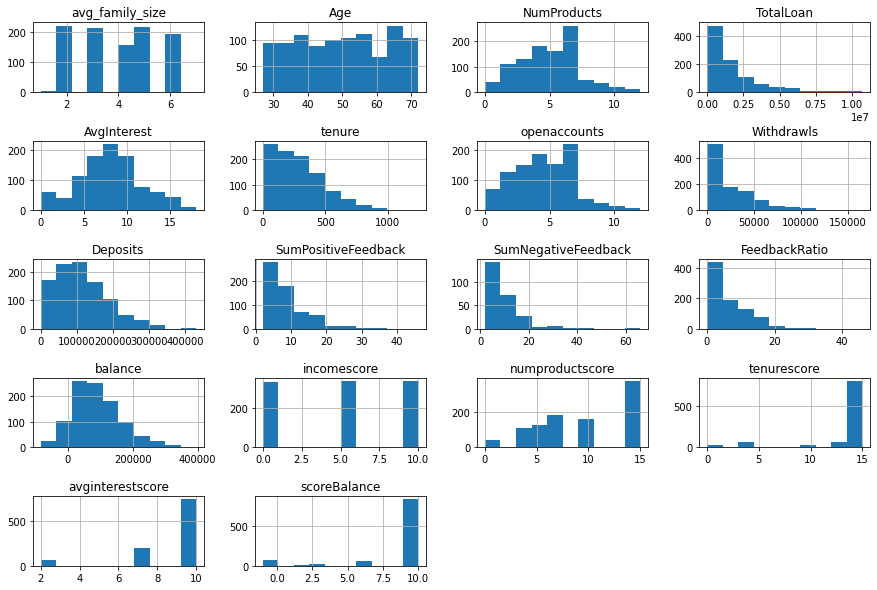

In [0]:
df_churn1.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.7);

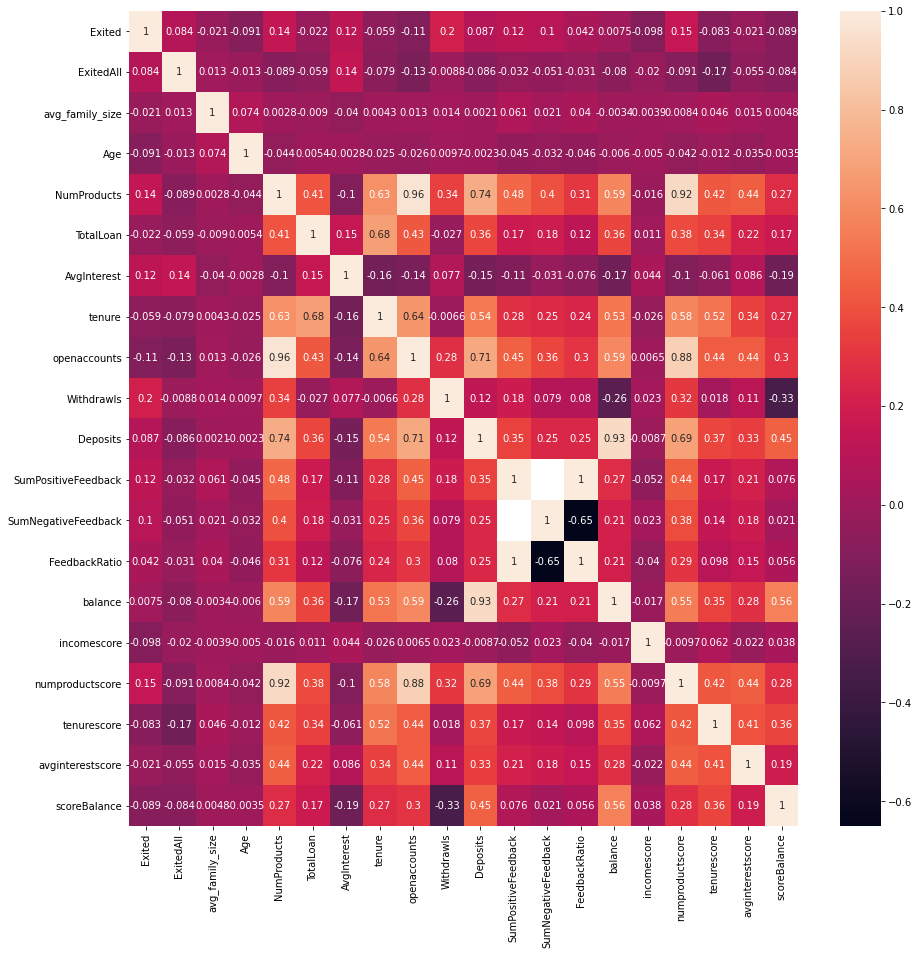

In [0]:
df_churn1 = df_churn[['Exited','ExitedAll','avg_family_size','Age','NumProducts','TotalLoan','AvgInterest','tenure','openaccounts','Withdrawls','Deposits','SumPositiveFeedback','SumNegativeFeedback','FeedbackRatio','balance','incomescore','numproductscore','tenurescore','avginterestscore','scoreBalance']]
plt.subplots(figsize=(15,15))
sns.heatmap(df_churn1.corr(),annot=True);

Out[101]:

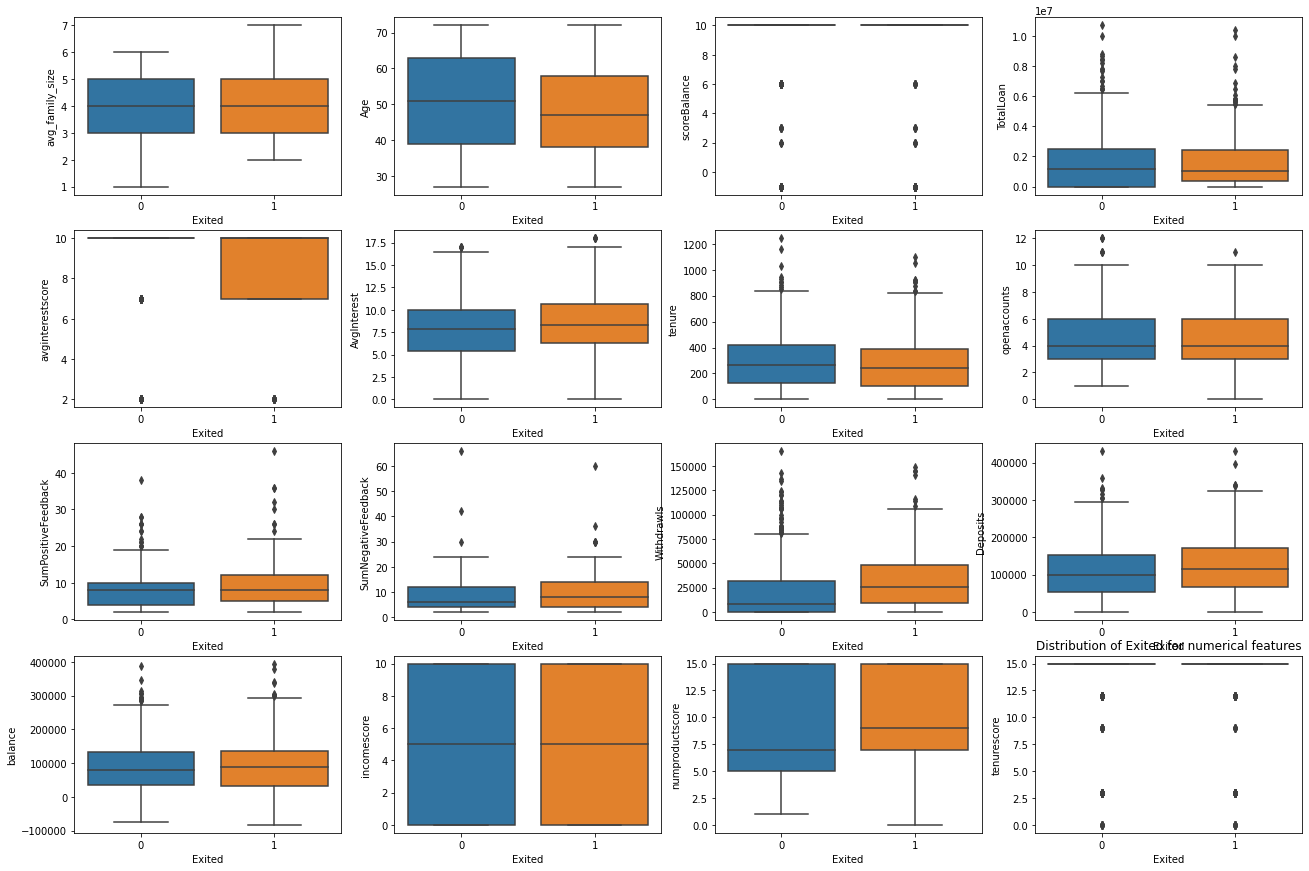

(Text(0.5, 1.0, 'Distribution of Exited for numerical features'),)

In [0]:


fig, axes = plt.subplots(4, 4, figsize=(22, 15))
sns.boxplot(ax=axes[0, 0], data=df_churn1, x='Exited', y='avg_family_size')
sns.boxplot(ax=axes[0, 1], data=df_churn1, x='Exited', y='Age')
sns.boxplot(ax=axes[0, 2], data=df_churn1, x='Exited', y='scoreBalance')
sns.boxplot(ax=axes[0, 3], data=df_churn1, x='Exited', y='TotalLoan')
sns.boxplot(ax=axes[1, 0], data=df_churn1, x='Exited', y='avginterestscore')
sns.boxplot(ax=axes[1, 1], data=df_churn1, x='Exited', y='AvgInterest')
sns.boxplot(ax=axes[1, 2], data=df_churn1, x='Exited', y='tenure')
sns.boxplot(ax=axes[1, 3], data=df_churn1, x='Exited', y='openaccounts')
sns.boxplot(ax=axes[2, 0], data=df_churn1, x='Exited',  y='SumPositiveFeedback')
sns.boxplot(ax=axes[2, 1], data=df_churn1, x='Exited', y='SumNegativeFeedback')
sns.boxplot(ax=axes[2, 2], data=df_churn1, x='Exited', y='Withdrawls')
sns.boxplot(ax=axes[2, 3], data=df_churn1, x='Exited', y='Deposits')
sns.boxplot(ax=axes[3, 0], data=df_churn1, x='Exited', y='balance')
sns.boxplot(ax=axes[3, 1], data=df_churn1, x='Exited', y='incomescore')
sns.boxplot(ax=axes[3, 2], data=df_churn1, x='Exited', y='numproductscore')
sns.boxplot(ax=axes[3, 3], data=df_churn1, x='Exited', y='tenurescore')

plt.title('Distribution of Exited for numerical features'), 